In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

dogbitedata = pd.read_csv('https://raw.githubusercontent.com/bviri/lgcc-continuing-ed-python-class/main/DOHMH_Dog_Bite_Data_20240715.csv')
dogbitedata.shape # counts rows and columns

(26127, 9)

In [ ]:
dogbitedata.info() # lists columns, if any null rows, data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26127 entries, 0 to 26126
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniqueID    26127 non-null  int64 
 1   DateOfBite  26127 non-null  object
 2   Species     26127 non-null  object
 3   Breed       23864 non-null  object
 4   Age         12868 non-null  object
 5   Gender      26127 non-null  object
 6   SpayNeuter  26127 non-null  bool  
 7   Borough     26127 non-null  object
 8   ZipCode     18960 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.6+ MB


In [ ]:
dogbitedata.head()


,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224


In [ ]:
dogbitedata.describe(include='all').T
# the describe shows a good number of stats for the data, specifically the top column, aka the breed that appeared most = pit bull

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UniqueID,26127.0,NaN,NaN,NaN,5187.019405,3422.879645,1.0,2178.0,4800.0,8066.0,12383.0
DateOfBite,26127,2919,June 06 2015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Species,26127,1,DOG,26127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breed,23864,1782,Pit Bull,4541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,12868,232,2,1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,26127,3,U,12451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SpayNeuter,26127,2,False,19629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Borough,26127,6,Queens,6693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZipCode,18960,557,10029,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dogbitedata.isnull().sum()
# though from the previous chart we had a top age, more than half of the ages of dogs weren't listed, so i'll drop that column (even though it might have been a good measure) due to lack of data


UniqueID          0
DateOfBite        0
Species           0
Breed          2263
Age           13259
Gender            0
SpayNeuter        0
Borough           0
ZipCode        7167
dtype: int64

In [ ]:
datadropped = ['Species', 'Age', 'ZipCode']
# dropping species because they're all dogs, age because of lack of data, and zipcode because borough is a better measure for me
dogbitedata.drop(datadropped, inplace= True, axis=1)
dogbitedata.columns

Index(['UniqueID', 'DateOfBite', 'Breed', 'Gender', 'SpayNeuter', 'Borough'], dtype='object')

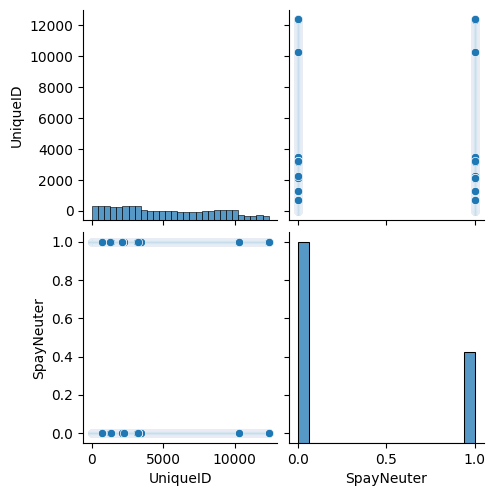

In [ ]:
sns.pairplot(dogbitedata)

In [ ]:
dogbitedata.head()

,UniqueID,DateOfBite,Breed,Gender,SpayNeuter,Borough
0,1,January 01 2018,UNKNOWN,U,False,Brooklyn
1,2,January 04 2018,UNKNOWN,U,False,Brooklyn
2,3,January 06 2018,Pit Bull,U,False,Brooklyn
3,4,January 08 2018,Mixed/Other,M,False,Brooklyn
4,5,January 09 2018,Pit Bull,U,False,Brooklyn


In [ ]:
dogbitedata['Gender'].value_counts()
# more than half of the dog bite reported didn't have genders reported, so i've decided not to use this data

Gender
U    12451
M     9882
F     3794
Name: count, dtype: int64

In [ ]:
dogbitedata['Breed'].value_counts()

Breed
Pit Bull                     4541
UNKNOWN                      3425
Shih Tzu                      797
Chihuahua                     728
German Shepherd               721
                             ... 
ROTTWEILER / SHEPHARD MIX       1
SOFT WHEATON TERRIER            1
COCKER SPANIEL / BEAGLE         1
AMERICAN BULL / MASTIFF         1
SIBERIAN                        1
Name: count, Length: 1782, dtype: int64

In [ ]:
# let's remove the unknown species for dogbites
dogbitedata = dogbitedata[dogbitedata["Breed"].str.contains("UNKNOWN") == False]
dogbitedata['Breed'].value_counts()



Breed
Pit Bull                                4541
Shih Tzu                                 797
Chihuahua                                728
German Shepherd                          721
American Pit Bull Mix / Pit Bull Mix     568
                                        ... 
MALTESE/ SHIHTZU MIX                       1
ROTWEILER MIX                              1
CATTLE DOG X - LAB                         1
GERMAN SHEPARD                             1
SIBERIAN                                   1
Name: count, Length: 1775, dtype: int64

In [ ]:
dogbitedata.groupby('Breed').count()

# cool, an interactive chart! but... there are so many dog breeds in this. i just want the top 10 dog breeds that were reported to bite

,UniqueID,DateOfBite,Species,Age,Gender,SpayNeuter,Borough,ZipCode
Breed,,,,,,,,
/SHIH TZU MIX,1,1,1,1,1,1,1,1
2 BULL TERRIER DOGS,1,1,1,1,1,1,1,1
2 DOGS: TERR X & DOBERMAN,1,1,1,1,1,1,1,1
2 GERMAN SHEPHERDS,1,1,1,1,1,1,1,1
2 PITBULLS,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...
YORKY-POODLE,1,1,1,1,1,1,1,1
Yorkshire Terrier,542,542,542,315,542,542,542,435
Yorkshire Terrier Crossbreed,50,50,50,42,50,50,50,45


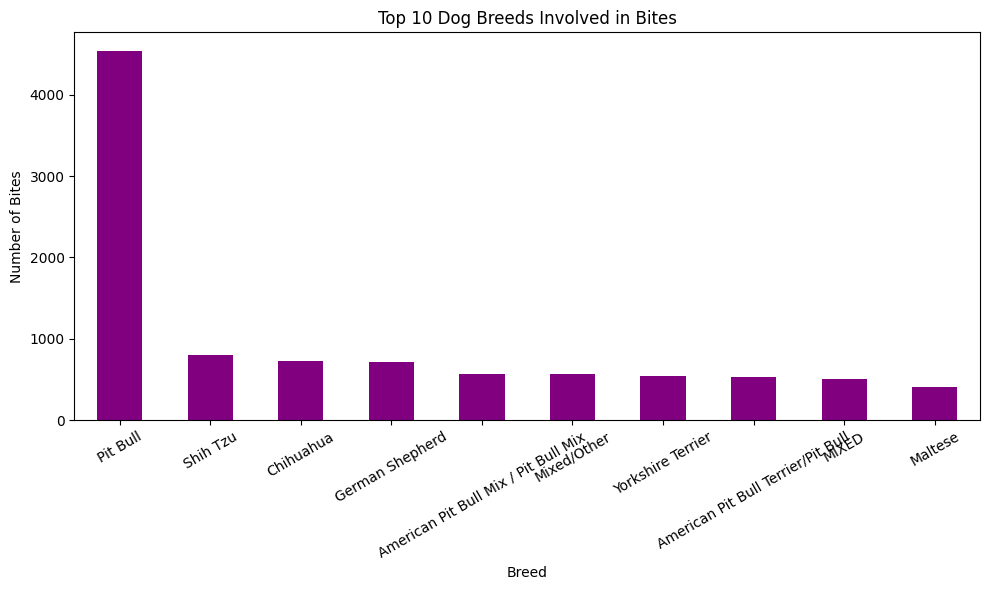

In [ ]:
# @title Does Species Affect Dog Bites? - with the top 10 dog breeds
# i was struggling a bit with the nlargest code, so admittedly I used chatgpt to help me with solving that
 # (slapped myself in the face when i saw i just forgot to rename the dataset and everything else i was doing was correct!)

top_breeds = dogbitedata['Breed'].value_counts().nlargest(10)


plt.figure(figsize=(10, 6))
top_breeds.plot(kind='bar',color='purple')
plt.title('Top 10 Dog Breeds Involved in Bites')
plt.xlabel('Breed')
plt.ylabel('Number of Bites')
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()



In [ ]:
dogbitedata['SpayNeuter'].value_counts()

SpayNeuter
False    14075
True      6351
Name: count, dtype: int64

Text(0.5, 1.0, 'Has The Dog Been Spayed/Neutered?')

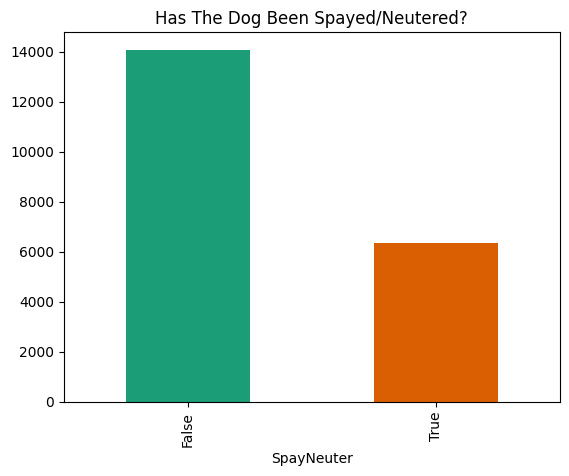

In [80]:
# @title Has the Dog Been Spayed/Neutered?

dogbitedata.groupby('SpayNeuter').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2')).set_title('Has The Dog Been Spayed/Neutered?')


Text(0.5, 1.0, 'Dog Bites per Borough')

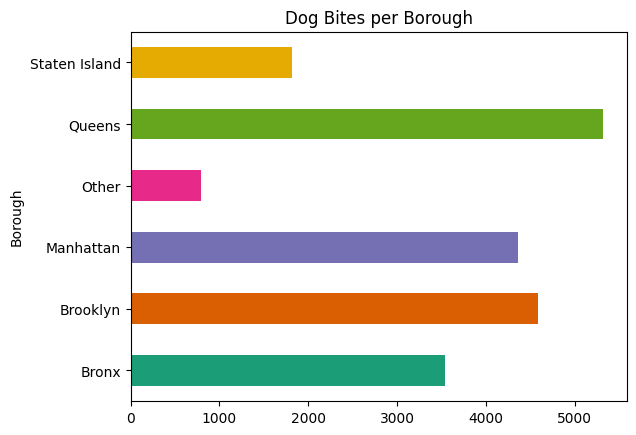

In [81]:
# @title Dog Bites Per Borough

dogbitedata.groupby('Borough').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')).set_title('Dog Bites per Borough')

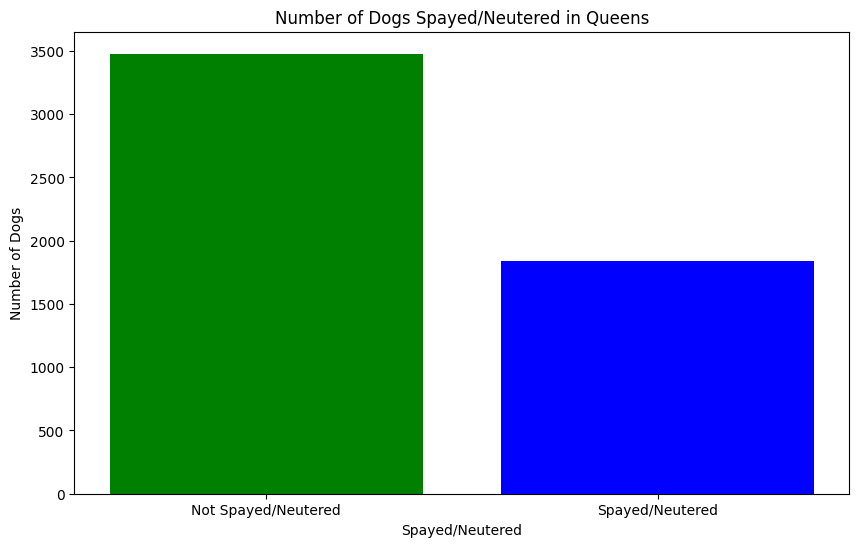

In [ ]:
# @title Not Spayed/Spayed Queens Specifically

queensdogbites = dogbitedata[(dogbitedata['Borough'] == 'Queens')]
#separating dog bite data

spayneuterdogdata = queensdogbites['SpayNeuter'].value_counts()

# prepare data for plotting
notspayneutered = spayneuterdogdata.index
spayneutered = spayneuterdogdata.values

plt.figure(figsize=(10, 6))
plt.bar(notspayneutered, spayneutered, color=['green', 'blue'])
plt.xlabel('Spayed/Neutered')
plt.ylabel('Number of Dogs')
plt.title('Number of Dogs Spayed/Neutered in Queens')
plt.xticks(notspayneutered, ['Not Spayed/Neutered', 'Spayed/Neutered'])
plt.show()


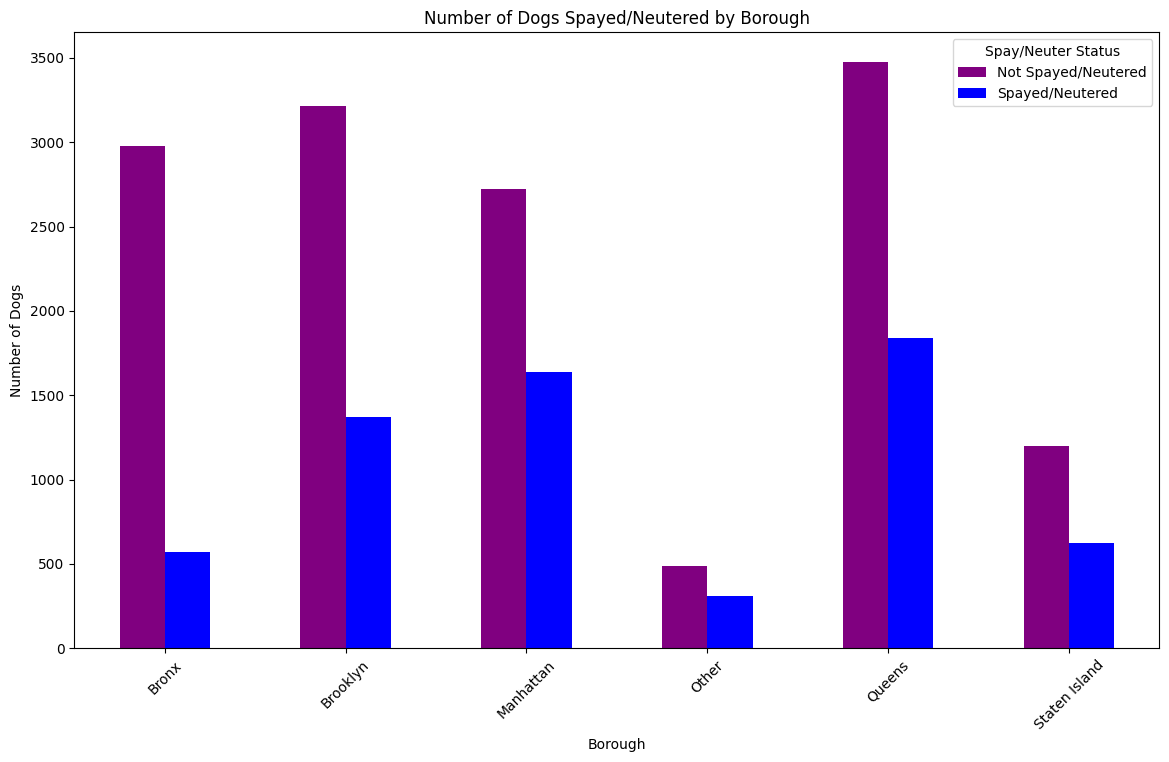

In [ ]:
# @title Number of Dogs Spayed/Neutered by Borough

# unfortunately did use chatgpt for this one too, so i'm labeling for myself what each thing does

spayneuterbyborough = dogbitedata.groupby(['Borough', 'SpayNeuter']).size().unstack(fill_value=0)
# fill_value adds missing/NaN values
# unstack gives the original dataframe with the original labels and columns intact

spayneuterbyborough.plot(kind='bar', figsize=(14, 8), color=['purple', 'blue'])
plt.xlabel('Borough')
plt.ylabel('Number of Dogs')
plt.title('Number of Dogs Spayed/Neutered by Borough')
plt.xticks(rotation=45)
plt.legend(title='Spay/Neuter Status', labels=['Not Spayed/Neutered', 'Spayed/Neutered'])
plt.show()
